In [1]:
# For manipulating data frames
from pandas import *

# For plotting results
import matplotlib.pyplot as plt
from plotnine import *

# Set up synthetic data

In [2]:
green = "#00843D"
gray = "#707372"

In [3]:
data = DataFrame({'Kd_nM':[0.01,0.1, 1, 10, 100],'EC50_healthy_mpk':[0.05, 0.2, 0.8, 2.4, 9.6], 
              'EC50_tumor_mpk':[0.1, 0.2, 0.3, 0.4, 0.5]})
data

,Kd_nM,EC50_healthy_mpk,EC50_tumor_mpk
0,0.01,0.05,0.1
1,0.10,0.20,0.2
2,1.00,0.80,0.3
3,10.00,2.40,0.4
4,100.00,9.60,0.5


# Plot using `matplotlib`

Text(0.5, 0, 'EC50 (mpk)')

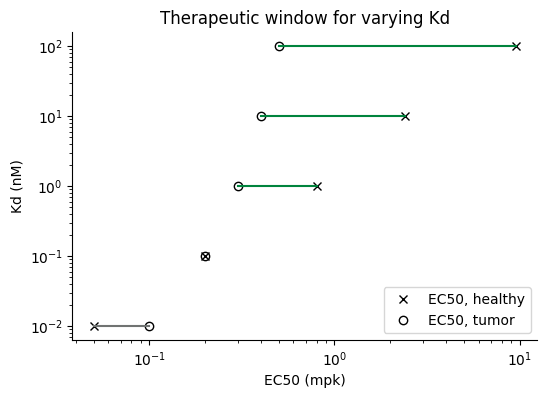

In [4]:
fig, (ax) = plt.subplots(figsize = (6, 4), nrows = 1, ncols = 1)

# Determine which rows of the table correspond to a positive therapeutic window, meaning that the EC50 on healthy cells is 
# greater than the EC50 on tumor cells
TW_positive = data.EC50_healthy_mpk > data.EC50_tumor_mpk

# Plot the EC50s. We use x's to denote EC50 on healthy cells and o's to denote EC50 on tumor cells.
ax.loglog(data.EC50_healthy_mpk, data.Kd_nM, 'x', color = 'black', label='EC50, healthy')
ax.loglog(data.EC50_tumor_mpk, data.Kd_nM, 'o', color = 'black', markerfacecolor='none', label='EC50, tumor')

# Add lines for the therapeutic window. When the therapeutic window is positive, the line is green. If the therapeutic window
# is negative, the line is gray.
ax.loglog([data.EC50_tumor_mpk[TW_positive], data.EC50_healthy_mpk[TW_positive]] , [data.Kd_nM[TW_positive], data.Kd_nM[TW_positive]],
          '-', color = green)
ax.loglog([data.EC50_tumor_mpk[~TW_positive], data.EC50_healthy_mpk[~TW_positive]] , [data.Kd_nM[~TW_positive], data.Kd_nM[~TW_positive]],
          '-', color = gray)


# Plotting settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(title="", loc='lower right')

ax.set_title('Therapeutic window for varying Kd')
ax.set_ylabel('Kd (nM)')
ax.set_xlabel('EC50 (mpk)')

# Plot using `plotnine`

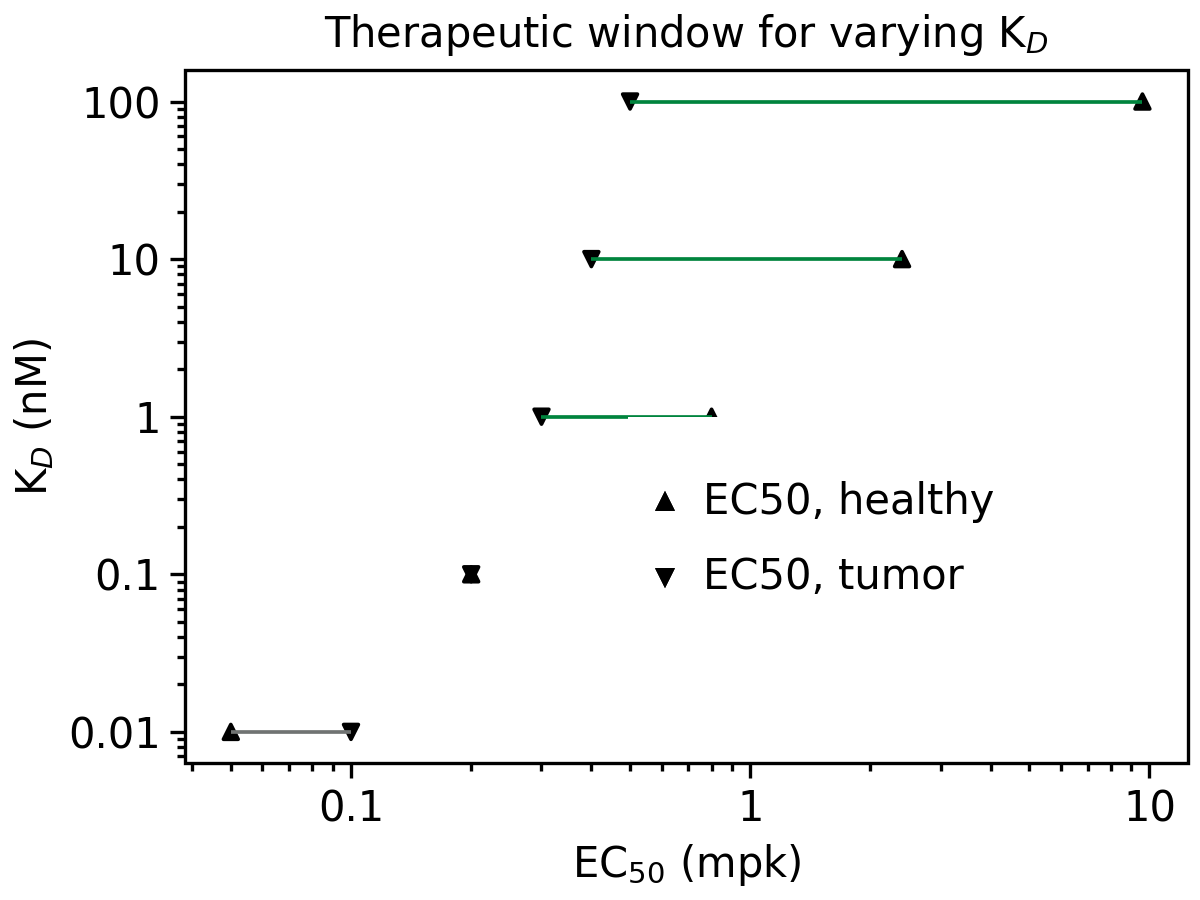

In [5]:
(
    ggplot(data)
    + geom_point(aes(x = 'EC50_healthy_mpk', y = 'Kd_nM', shape = '"EC50, healthy"'))
    + geom_point(aes(x = 'EC50_tumor_mpk', y = 'Kd_nM', shape = '"EC50, tumor"'))
    + geom_segment(aes(x = 'EC50_healthy_mpk', xend = 'EC50_tumor_mpk', 
                       y = 'Kd_nM', yend = 'Kd_nM', 
                       color = 'EC50_healthy_mpk > EC50_tumor_mpk'))
    + scale_color_manual(values = {False: gray, True: green})
    + scale_shape_manual(values = {'EC50, healthy':'^', 'EC50, tumor':'v'})
    + guides(color=False) # Remove color legend
    + scale_x_log10()
    + scale_y_log10()
    + labs(x = 'EC$_{50}$ (mpk)', y = 'K$_D$ (nM)', shape = "", 
           title = "Therapeutic window for varying K$_D$")
    + theme_matplotlib()
    + theme(
        figure_size = (4,3),
        dpi = 150,
        legend_position=(0.7, 0.3), # Move legend to inside plot (70% to the right, 30% up)
        legend_direction = 'vertical',
        panel_grid = element_blank() # turn off gridlines
    )
)